In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Route Visualizer

Objective: Create a tool that visualizes each receiver's route distribution, along with stats describing how well they ran each route (EPA). 

In [8]:
play_data = pd.read_csv("player_play.csv")
play_data.dropna(subset=["routeRan"],inplace=True)
print("42,779 routes run across {} games".format(len(pd.unique(play_data["gameId"]))))
print("Total receivers: {}".format(len(pd.unique(play_data["nflId"]))))
play_data

42,779 routes run across 136 games
Total receivers: 480


,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022090800,56,47879,BUF,0,0,0,0,0,0,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022090800,56,52536,BUF,0,0,0,0,0,0,...,1.0,GO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2022090800,122,42489,BUF,0,0,0,0,0,0,...,1.0,GO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354522,2022110700,3480,44879,NO,0,0,0,0,0,0,...,1.0,FLAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354523,2022110700,3480,46160,NO,0,0,0,0,0,0,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354526,2022110700,3480,52942,NO,0,0,0,0,0,1,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354527,2022110700,3480,53098,NO,0,0,0,0,0,0,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
catch_data = play_data[play_data["hadPassReception"] == 1]
print("Targetted Receivers: {}".format(len(pd.unique(catch_data["nflId"]))))
catch_data

Targetted Receivers: 409


,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2022090800,122,47857,BUF,0,0,0,0,0,1,...,1.0,FLAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2022090800,167,42489,BUF,0,0,0,0,0,1,...,1.0,SLANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,2022090800,212,52494,BUF,0,0,0,0,0,1,...,1.0,ANGLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,2022090800,236,52536,BUF,0,0,0,0,0,1,...,1.0,CORNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354395,2022110700,3299,53098,NO,0,0,0,0,0,1,...,1.0,SLANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354418,2022110700,3323,54476,NO,0,0,0,0,0,1,...,1.0,SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354435,2022110700,3347,46160,NO,0,0,0,0,0,1,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354478,2022110700,3401,46160,NO,0,0,0,0,0,1,...,1.0,HITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial Data Exploration notes:
* 42,779 routes run
* 136 games (from September 8 to November 7, 2022)
* 8,366 targets
* 5,620 receptions
* 480 total route-runners, 431 of which were targetted

In [10]:
route_counts = play_data["routeRan"].value_counts()
route_counts

GO        7806
HITCH     6296
FLAT      6208
OUT       4293
CROSS     4219
IN        3373
POST      2701
SLANT     2295
CORNER    1841
SCREEN    1802
ANGLE     1725
WHEEL      220
Name: routeRan, dtype: int64

Text(0, 0.5, 'Number of times run')

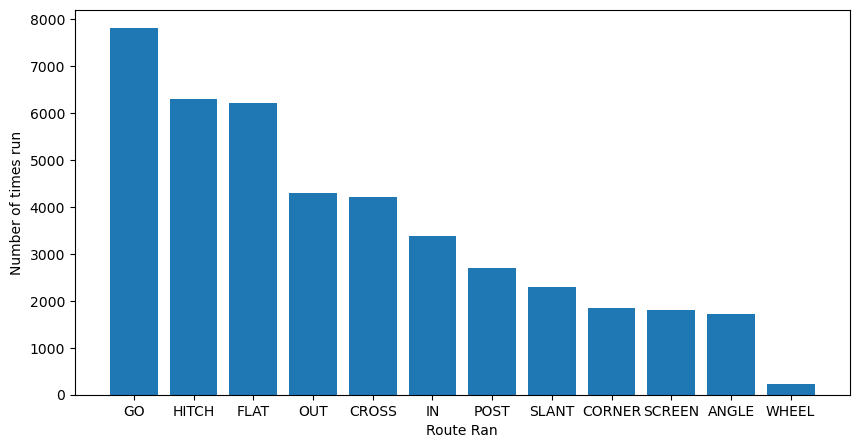

In [15]:
plt.figure(figsize=(10,5))
plt.bar(route_counts.index, route_counts)
plt.xlabel("Route Ran")
plt.ylabel("Number of times run")

Data Sources & Locations:
* **player_play.csv**
    * *nflId*: Unique identifier for each player
    * *gameId, playId*: Identifiers for game, play. Used for analyzing/visualizing specific games & plays
    * hadPassReception: Boolean, used to track catches
    * routeRan: String describing the route run
    * wasTargettedReceiver: Boolean showing if the receiver was targeted
* **plays.csv**
    * *gameId, playId*: Identifiers used to match player data to play data
    * expectedPointsAdded: Float, measuring how well the play went
    * pff_passCoverage: (Optional) String, for analyzing route performance vs specific defenses
* **players.csv**
    * *nflId*: Unique identifier for each player
    * displayName: String, player's name (use in visuals)
* **tracking_week_x.csv**
    * *gameId, playId*: Identifiers for game, play. Used for analyzing/visualizing specific games & plays
    * *nflId*: Unique identifier for each player
    * frameId: Int, used to animate plays
    * jerseyNumber: Int, used to show players in animations
    * club: String, used to color players in animations
    * x,y: Floats, player location on the field